<a href="https://colab.research.google.com/github/AQISSIAQ111503/Proje/blob/main/stats_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title


Formula 1 Driver Consistansy


# Abstract


Studying the relationship between Formula 1 driver groups and the drivers avrage variance of lap time across an entier season. Intrested in seeing if the top drivers have a smaller or larger variance compared to the lap time variance of the rest of the drivers. The average lap time variance will be taken across the whole 2023 season, then anaylzed through a One-Way ANOVA test to see if there is statistical significances in the variances. All data collection and analysis was completed in python code.


###Leading Quesiton


Do the average lap time variances differ across the 3 groups of Formula 1 drivers? Does higher or lower variances relate to better or wores finsihing in the drivers championship?

# Introduction



&nbsp;&nbsp;&nbsp;&nbsp;Formula 1 is a motorsports series that originated in the 1950s. Since its conception, the sport has changed dramatically, from little to no safety and pure driver instinct to the intense physical training and heavy reliance on data analysis seen today; before, during, and after the races. Arguably the most important data point is lap time. Lap time is the total amount of time it takes a driver to complete one full lap around the track. Measured from the start/finish line. This lap time is always changing. Fuel, tires, other drviers are just a few of the countless variables that can affect lap time. Whaile the fastest lap time doesnt garantee a race win, being the fastest around the circit gives a better chance to win.

&nbsp;&nbsp;&nbsp;&nbsp;Starting off with the question, it would make sense that the top driver are the most consistent. As the drivers who finsih lower in the drivers standing its possible they have more "lucky" laps where they shave a large amount of time off of their lap times. Or more "unlucky" laps where a mistake heppen causeing additionl seconds to the lap time. The frontrunner drivers need to be constistantly faster than everyone else in order to be the fastest. Leading me to belive the frontrunners should be the most consistent drivers with the least variation in their lap times.

&nbsp;&nbsp;&nbsp;&nbsp;The data used is dats pulled from the official Formula 1 data streams. Very acurate data requireing no further modefication from me. All of the data is brought into Python code via the FastF1 python libray to have machines process all of the information.


# Methods



Any other text for the methods section

### I. Data Collection


&nbsp;&nbsp;&nbsp;&nbsp;All of the dta for this anaylissi came from the python libray called "FastF1." This Libray pulls data automatically from the “Formula 1 Live Timing Data Streams." This results in perfectly acutate data that is easy to use. This is the same data that is used for the live brodcasting during the race, and all other Formula 1 analytics. Only a fraction of the data that is  available in this libary is being used for the study. With laptime being the only data needed, every lap time for any driver in any race can be pulled and printed with the following code.

In [ ]:
!pip install fastf1 --quiet

import os
import fastf1
import pandas as pd
import logging
import warnings

warnings.filterwarnings("ignore")
logging.getLogger('fastf1').setLevel(logging.ERROR)

cache_dir = "/content/f1cache"
os.makedirs(cache_dir, exist_ok=True)
fastf1.Cache.enable_cache(cache_dir)

# Load session
session = fastf1.get_session(2023, "Belgian Grand Prix", "R")
session.load()

# Get Verstappen laps using new API
laps = session.laps.pick_drivers(["VER"])

print("Lap Times for Max Verstappen (VER) – 2023 Belgian Grand Prix:\n")

for _, lap in laps.iterlaps():
    lap_num = int(lap["LapNumber"])
    lap_time = lap["LapTime"]

    if not pd.isna(lap_time):
        lap_str = (
            f"{lap_time.components.minutes}:"
            f"{lap_time.components.seconds:02d}."
            f"{lap_time.components.milliseconds:03d}"
        )
    else:
        lap_str = "Invalid Lap"

    print(f"Lap {lap_num:2d}: {lap_str}")


Lap Times for Max Verstappen (VER) – 2023 Belgian Grand Prix:

Lap  1: 1:55.659
Lap  2: 1:53.103
Lap  3: 1:52.277
Lap  4: 1:52.789
Lap  5: 1:52.602
Lap  6: 1:52.130
Lap  7: 1:52.415
Lap  8: 1:52.472
Lap  9: 1:51.880
Lap 10: 1:52.455
Lap 11: 1:52.613
Lap 12: 1:52.714
Lap 13: 1:52.962
Lap 14: 1:57.166
Lap 15: 2:03.986
Lap 16: 1:50.696
Lap 17: 1:50.108
Lap 18: 1:51.637
Lap 19: 1:51.956
Lap 20: 1:55.733
Lap 21: 1:54.915
Lap 22: 1:55.325
Lap 23: 1:52.905
Lap 24: 1:50.996
Lap 25: 1:51.106
Lap 26: 1:51.377
Lap 27: 1:51.472
Lap 28: 1:51.410
Lap 29: 1:51.595
Lap 30: 1:55.882
Lap 31: 2:03.585
Lap 32: 1:48.922
Lap 33: 1:50.586
Lap 34: 1:50.792
Lap 35: 1:50.408
Lap 36: 1:50.362
Lap 37: 1:50.317
Lap 38: 1:50.147
Lap 39: 1:50.113
Lap 40: 1:50.067
Lap 41: 1:49.954
Lap 42: 1:50.187
Lap 43: 1:50.095
Lap 44: 1:50.579


&nbsp;&nbsp;&nbsp;&nbsp;This talbe doesnt get generated when the full code is ran. This table shows the data for one driver, Max Verstappen throughout 1 race, the Belgian Grand Prix. 19 drivers lap times are being considered over 22 races. 418 of these tables of lap times are used. In this analysis the lap times were pulled from the 2023 F1 season. This season had 22 races and a total of 22 drivers. 3 of these 22 drivers did not get the chance to race the whole season. For this reason I decided to exclude them from the final analysis. There was more to exclude. As not all lap are the same in any race, there was certian obsticles to remove. With in the "FastF1" libray there is a prompted to exclude certian laps. In this clase all laps that werent considerde normal got excluded. A non-normal lap involves any lap where the drvier was unable to complete a entire lap without a slow down.Some slow downs include safty cars, pitting, crashing or retiering, ect. All of these instances would results in a deastically slower lap thus messing with that result.

### II. Statistical Methods



&nbsp;&nbsp;&nbsp;&nbsp;To anylize the variance a one-way ANOVA test short for analysis of variance was used. This ANOVA test is a statistical test used to determine whether there is a significant difference between the means of three or more independent groups. This test starts with a null and alternate hypothesis. In this case our null hypothesis would be that all three of the driver groups have the same or similar enough variances that it doesn't matter. The alternative hypothesis is then at least one of the drivers groups have a significant difference in variance. The one-way ANOVA test works by first calculating the mean of each group and the overall mean. Then the total variability in the data gets divided into two parts, the variability between the three groups, and the variability within the three groups. The between group variability measures how much the group means differ from the overall mean, while the in group variability measures the variation of the individual drivers within each group. Next comes the F-statication which is the ratio of the between group mean square and the within group mean square. The larger the F-value the greater the differences of the group means. This F-value can then be used to calculate the p value. If the p-value is less than a chosen significance level then the null hypothesis gets rejected. For this analysis a significance level of 0.05 was chosen which is pretty typical. This test is build into python by inporting [`from scipy.stats import f_oneway`]




# Results


Three plots where generated for this analysis, a race by race variance for each driver, and season average variance bar graph, and lastly plotting the p-value on the corespondin f-distrubution. The race by race variance plot turned out to be too messy and didnt display useful information. The two useful plots are following.

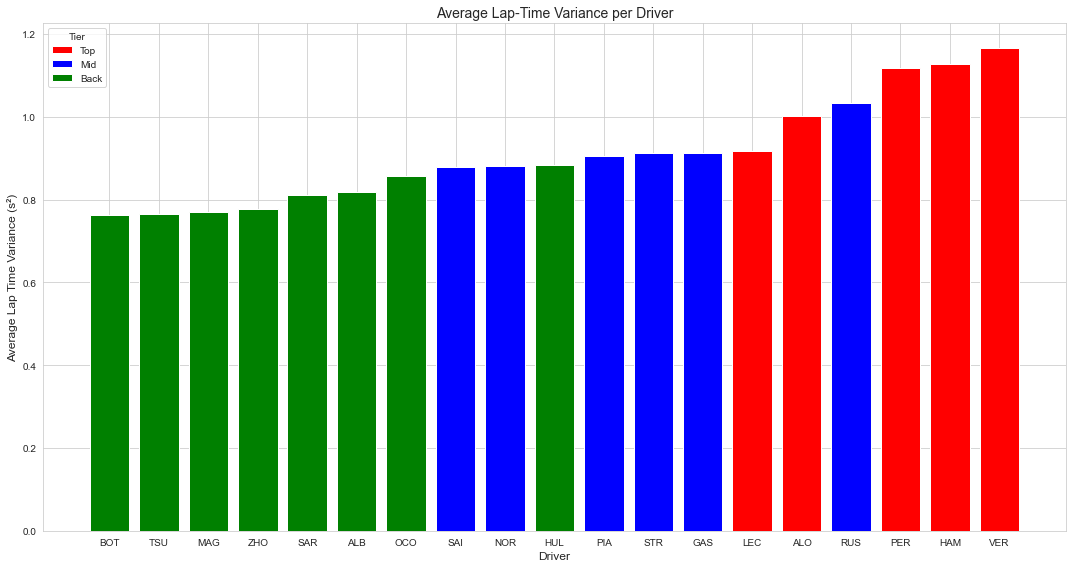

In [25]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Stats_bar_graph.png'
from IPython.display import Image
Image(img_path, width=300, height=200)

This bar graph shows the variance in lap time for each driver averaged across the whole season. Colored coded to match the driver groups. Red being the front runners, there does seem to be a large diffeance in the varance from most of the front runnner and everyone else. Another point on the bar graph is msot of the groups lay together. Excpet for two outliers all the groups are together. The visual inplizes theres a difference but next is to run the p-value to verify the differne is significant.

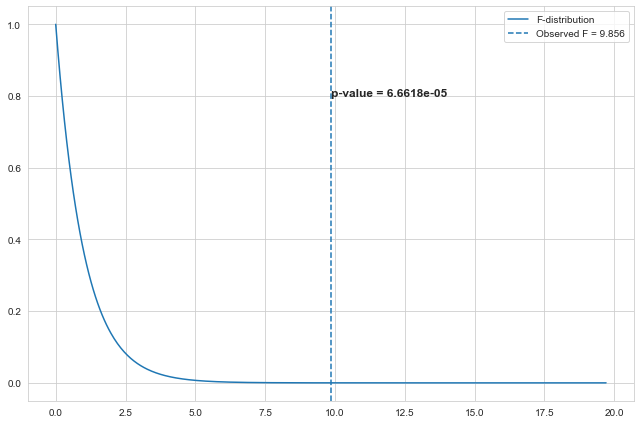

In [24]:
img_path = '/content/stats_p&f.png'
from IPython.display import Image
Image(img_path, width=300, height=200)


With the calculate p-value of 0.000067 which is much smaller then the chossen significan value of 0.05. Then by our one-way ANOVA test there is a statistical significant diffrence in the season averaged varaince in lap times between the three defined driver group.

# Discussion

These results show a clear and statisticaly significant diffrence for the lap time varanice of the 3 F1 driver groups. Thorugh the ANOVA test it was proven that the lap time varaice in these groups is due to the driver within the groups. The frontrunners have a much greater laptime varance then the other groups. Opposing my original thoughts. After the analysis the result does follow a diffrent train of thought. If every driver was the exact same, there was a failure to reject the null hypothesis, meaning there couldnt be a donimate driver or drivers. In this 2023 season Max Verstappen was a very dominate driver winning 19 out of the 22 races. When a driver is so domimate they need to be faster then everyone else, or faster then the other groups of drivers. But bering faster then everyone else isnt nessicary 100% of the race. Once the top driver is ahead they can match the pace of everyone else and still win. This is possibay the reason why the top drivers have a higher average lap time variance. A future intresting question to be to expand this to mulitiple season. To see if the front runners consistatly have a higher lap time variance over many seasons. Possibily looking at indidual drivers too over the seasons.

# References



1.   “Understanding Analysis of Variance (ANOVA) and the F-Test.” https://blog.minitab.com/en/blog/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test

2.   “Chapter 6. F-Test and One-Way ANOVA” https://opentextbc.ca/introductorybusinessstatistics/chapter/f-test-and-one-way-anova-2/

3.   “Analysis of Variance: Is There a Difference in Means and What Does It Mean?” https://pmc.ncbi.nlm.nih.gov/articles/PMC2405942/

4.   "FastF1" https://docs.fastf1.dev/

5.    ChatGPT: For Editing/formatting
